**Simple Linear regression model**

[[-0.72313942]
 [ 0.14620852]
 [-0.60459198]
 [-0.09088638]
 [ 1.37119879]
 [ 0.81797738]
 [-1.35539247]
 [ 2.28006255]
 [-0.68362361]
 [-0.99975013]
 [ 0.46233504]
 [ 0.50185086]
 [-0.4070129 ]
 [-0.60459198]
 [ 1.68732532]
 [-1.07878176]
 [-1.4344241 ]
 [ 0.93652482]
 [ 0.06717689]
 [-0.28846545]] [[-1.27636084]
 [ 2.20103092]
 [-0.24894964]
 [-0.32798127]
 [ 1.88490439]
 [ 1.56877787]
 [ 1.92442021]
 [-0.28846545]
 [ 0.22524015]
 [ 1.25265135]] [ 56642  66029  64445  61111 113812  91738  46205 121872  60150  39891
  81363  93940  57189  54445 105582  43525  39343  98273  67938  56957] [ 37731 122391  57081  63218 116969 109431 112635  55794  83088 101302]


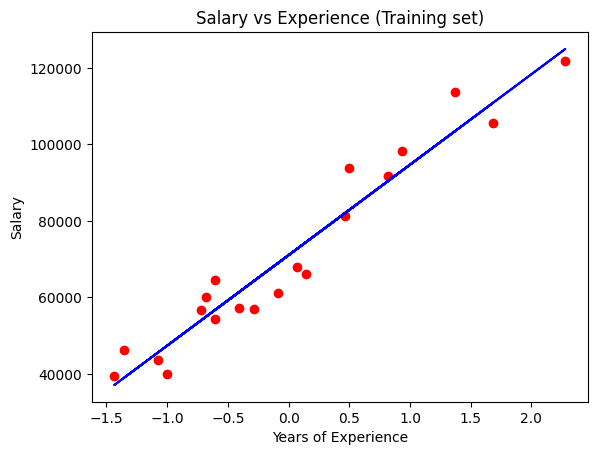

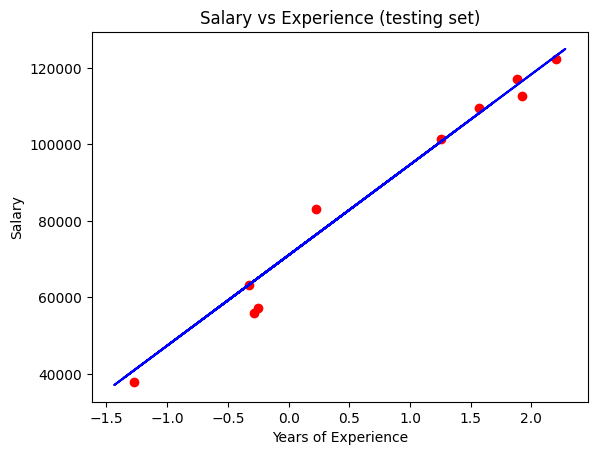

In [1]:

# Importing libraries
# -------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# ---------------------
dataset = pd.read_csv('/content/Simple-Linear-Dataset-1.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


# Splitting the dataset into the Training set and Test set
# --------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Feature scaling
# ---------------
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_train, X_test, y_train, y_test)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Multiple linear regression model**

R2 score:  0.32876397098136945


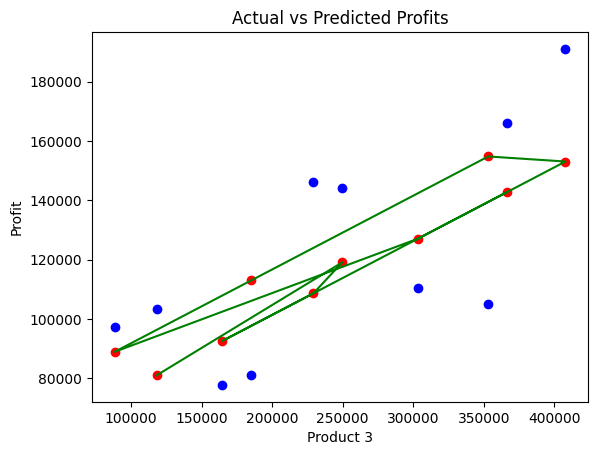

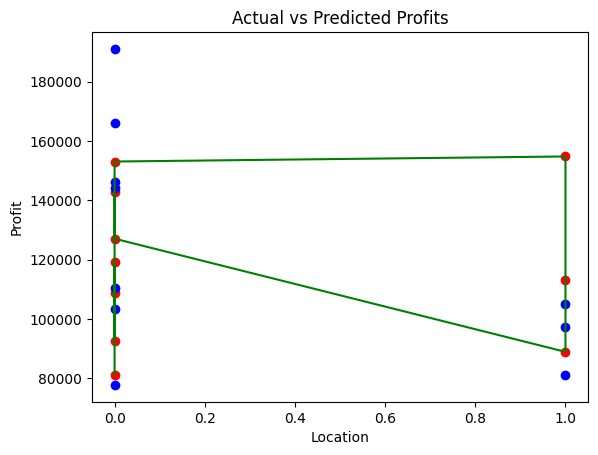

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.421
Time:                        21:14:50   Log-Likelihood:                -600.31
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.088e+05   6936.739     15.689      0.000    9.49e+04    1.23e+05
x1          9943.2135   1.23e+04      0.811      0.421   -1.47e+04    3.46e+04
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Importing the dataset
dataset = pd.read_csv('/content/Multiple-Linear-Dataset.csv')
# convert categorical variables to numeric using LabelEncoder
labelencoder = LabelEncoder()
dataset['Location'] = labelencoder.fit_transform(dataset['Location'])

# perform one-hot encoding on the 'Location' column
onehotencoder = OneHotEncoder(categories='auto')
location_encoded = onehotencoder.fit_transform(dataset[['Location']]).toarray()

# concatenate the encoded 'Location' column with the other features
X = np.concatenate((dataset[['Product_3']].values, location_encoded), axis=1)
y = dataset['Profit'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predicting the Test set results
Pred_y = reg.predict(X_test)

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, Pred_y)
print('R2 score: ', r2_score)

# Plotting predicted profits
plt.scatter(X_test[:, 0], Pred_y, color='red')
# Plotting actual profits
plt.scatter(X_test[:, 0], y_test, color='blue')
# Plotting regression line
plt.plot(X_test[:, 0], Pred_y, color='green')
# Adding labels and title
plt.xlabel('Product 3')
plt.ylabel('Profit')
plt.title('Actual vs Predicted Profits')
# Displaying the plot
plt.show()

# Plotting predicted profits
plt.scatter(X_test[:, 1], Pred_y, color='red')
# Plotting actual profits
plt.scatter(X_test[:, 1], y_test, color='blue')
# Plotting regression line
plt.plot(X_test[:, 1], Pred_y, color='green')
# Adding labels and title
plt.xlabel('Location')
plt.ylabel('Profit')
plt.title('Actual vs Predicted Profits')
# Displaying the plot
plt.show()

# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X = np.append(arr=np.ones((len(X), 1)).astype(int), values=X, axis=1)
X_opt = X[:, [0, 1, 2, 3, 4]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 3, 4]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 4]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 4]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()




**Polynomial linear regression**

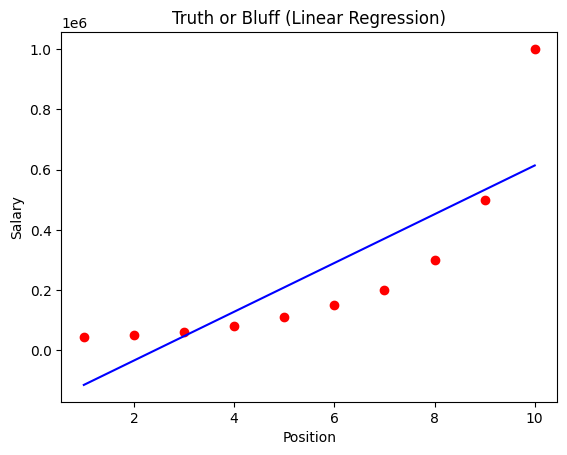

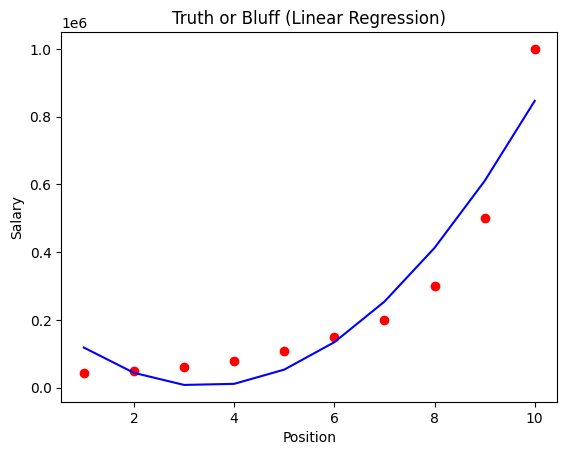

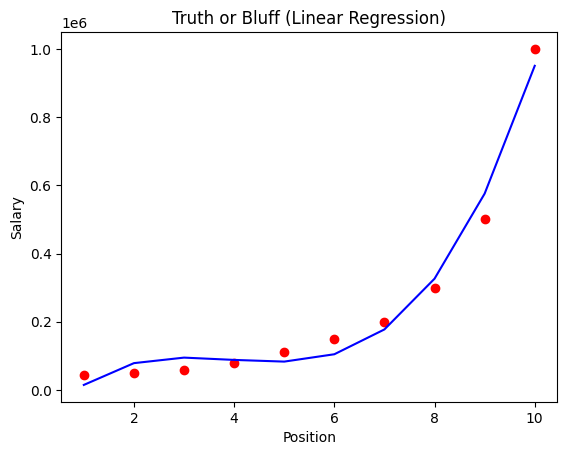

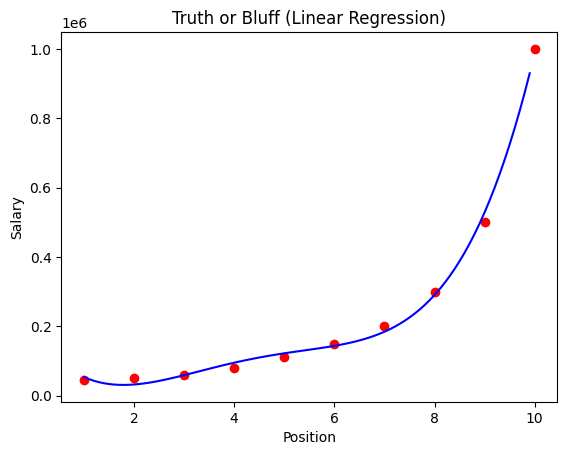

Salary with Linear Regression for an employee at level 6.5 is:  [330378.78787879]
Salary with Polynomial Regression for an employee at level 6.5 is:  [158862.45265155]


In [2]:
# Importing libraries
# -------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# ---------------------
dataset = pd.read_csv('/content/Polynomial-Dataset-1.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

# Visualising the Linear Regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Visualising the Polynomial Regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Fitting Polynomial Regression to the dataset with degree=3
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly, y)


# Visualising the Polynomial Regression results with degree=3
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_3.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Fitting Polynomial Regression to the dataset with degree=4
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly, y)

# Visualising the Polynomial Regression results with degree=4
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_4.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Predicting a new result with Linear Regression
print('Salary with Linear Regression for an employee at level 6.5 is: ',lin_reg.predict([[6.5]]))


# Predicting a new result with Polynomial Regression
print('Salary with Polynomial Regression for an employee at level 6.5 is: ',lin_reg_4.predict(poly_reg.fit_transform([[6.5]])))
